# LABORATORIO 4
### Paula Barillas - Diego Duarte

#### Parte 1 : Preparación del Conjunto de Datos 

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step
Shape de entrenamiento: (50000, 32, 32, 3)
Shape de prueba: (10000, 32, 32, 3)


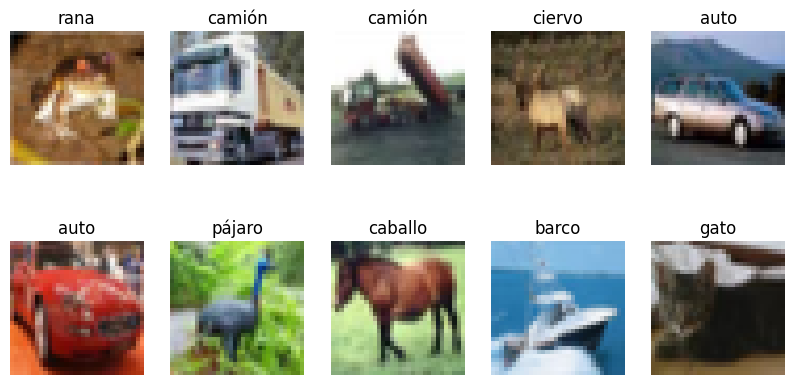

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# 1. Importar y cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape de entrenamiento:", x_train.shape)
print("Shape de prueba:", x_test.shape)

# 2. Normalización de los datos (pasar de [0,255] a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Mostrar ejemplos de imágenes con sus etiquetas
# CIFAR-10 tiene 10 clases: avión, auto, pájaro, gato, ciervo, perro, rana, caballo, barco, camión
class_names = ["avión", "auto", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


#### Parte 2: Modelo Base ANN

In [2]:
import time
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_val = x_train[45000:]
y_val = y_train_cat[45000:]
x_train_sub = x_train[:45000]
y_train_sub = y_train_cat[:45000]

model_ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),    # (32x32x3 → 3072)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

start = time.time()

history_ann = model_ann.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento: {end - start:.2f} segundos")

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.3203 - loss: 1.8887 - val_accuracy: 0.3326 - val_loss: 1.8521
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3892 - loss: 1.7102 - val_accuracy: 0.3920 - val_loss: 1.6799
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4154 - loss: 1.6343 - val_accuracy: 0.3962 - val_loss: 1.7129
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4336 - loss: 1.5866 - val_accuracy: 0.4304 - val_loss: 1.6011
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4525 - loss: 1.5347 - val_accuracy: 0.4588 - val_loss: 1.5440
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4626 - loss: 1.5044 - val_accuracy: 0.4446 - val_loss: 1.5658
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4728 - loss: 1.4785 - val_accuracy: 0.4616 - val_loss: 1.5291
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4814 - loss: 1.4580 - 

#### Parte 3: Implementación de CNN

In [4]:
# implementación modelo CNN para CIFAR-10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start = time.time()
history_cnn = model_cnn.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento CNN: {end - start:.2f} segundos")

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3669 - loss: 1.7249 - val_accuracy: 0.5498 - val_loss: 1.3208
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3669 - loss: 1.7249 - val_accuracy: 0.5498 - val_loss: 1.3208
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.4991 - loss: 1.3993 - val_accuracy: 0.5580 - val_loss: 1.2139
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.4991 - loss: 1.3993 - val_accuracy: 0.5580 - val_loss: 1.2139
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.5471 - loss: 1.2690 - val_accuracy: 0.6244 - val_loss: 1.1004
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.5471 - loss: 1.2690 - val_accuracy: 0.6244 - val_loss: 1.1004
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.5741 - loss: 1.1931 - val_accuracy: 0.6578 - val_loss: 1.0103
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.5741 - loss: 1.1931 - 

#### Parte 4: Evaluación y Comparación

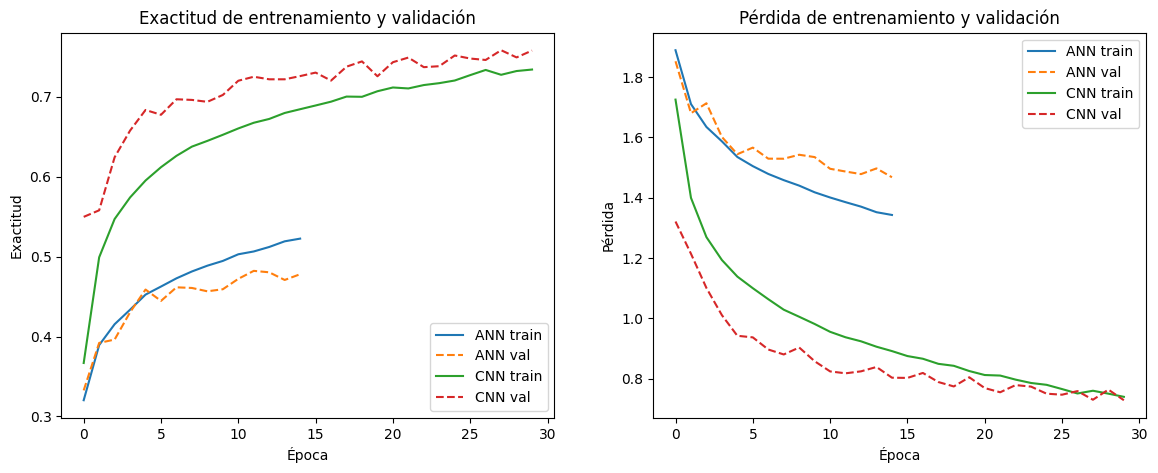


Evaluación ANN:
Exactitud en prueba: 47.87%

Evaluación CNN:
Exactitud en prueba: 47.87%

Evaluación CNN:
Exactitud en prueba: 73.82%

Errores ANN:
Exactitud en prueba: 73.82%

Errores ANN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


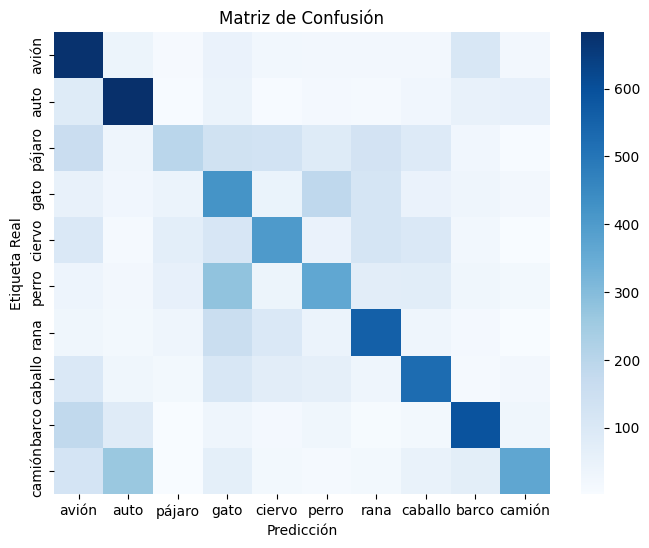

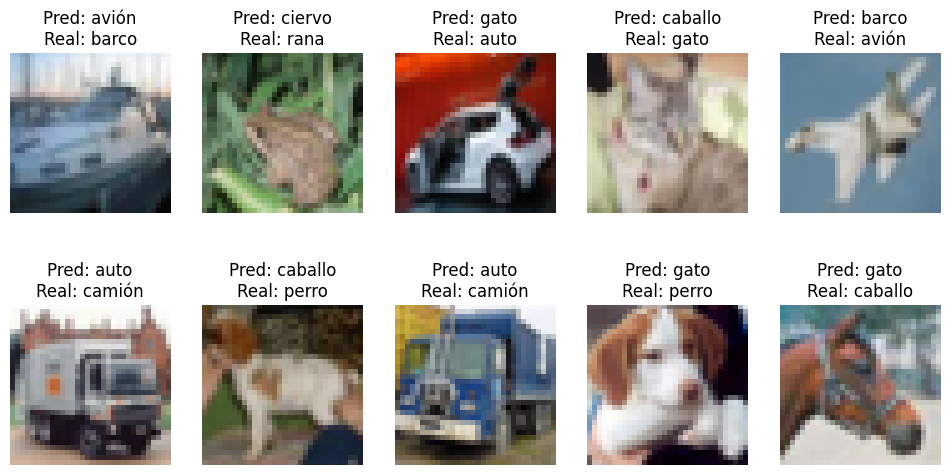


Errores CNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


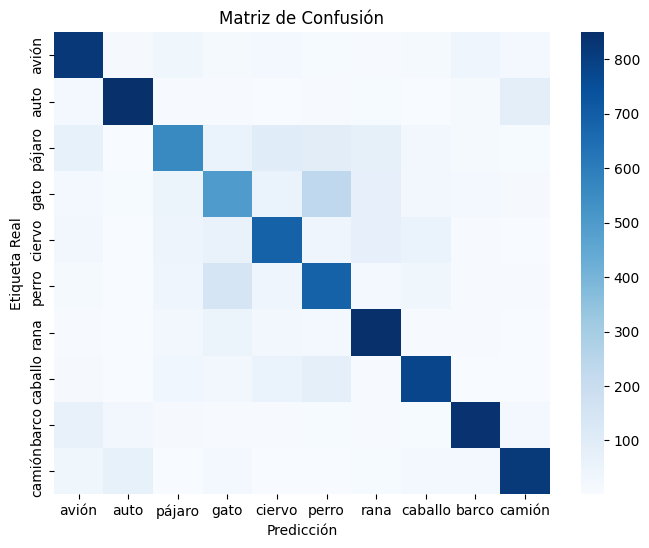

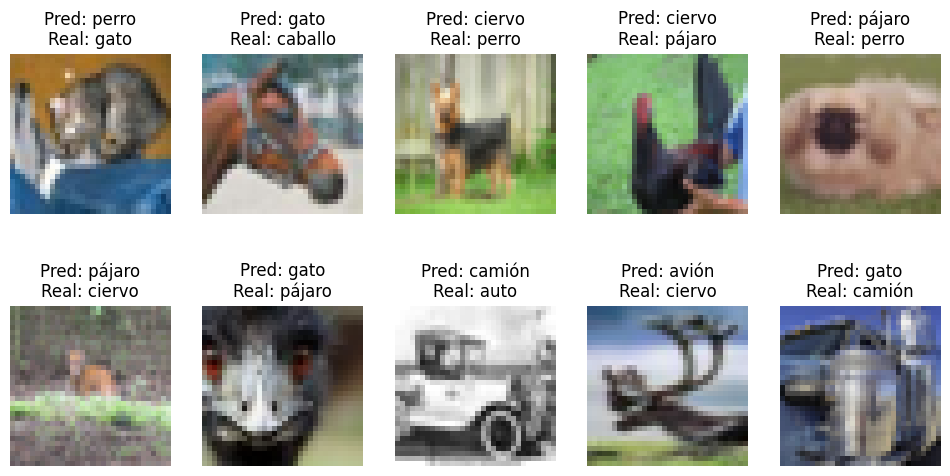

In [6]:
import matplotlib.pyplot as plt

# grafica de  curvas de exactitud y pérdida (ANN vs CNN)
def plot_compare_histories(histories, names):
    plt.figure(figsize=(14, 5))
    # Exactitud
    plt.subplot(1, 2, 1)
    for h, n in zip(histories, names):
        plt.plot(h.history['accuracy'], label=f'{n} train')
        plt.plot(h.history['val_accuracy'], '--', label=f'{n} val')
    plt.title('Exactitud de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()
    # Pérdida
    plt.subplot(1, 2, 2)
    for h, n in zip(histories, names):
        plt.plot(h.history['loss'], label=f'{n} train')
        plt.plot(h.history['val_loss'], '--', label=f'{n} val')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

plot_compare_histories([history_ann, history_cnn], ["ANN", "CNN"])

# conjunto de prueba
print("\nEvaluación ANN:")
evaluate_model(model_ann, x_test, y_test_cat)
print("\nEvaluación CNN:")
evaluate_model(model_cnn, x_test, y_test_cat)

# matriz de confusión y ejemplos de errores ANN
print("\nErrores ANN:")
confusion_and_errors(model_ann, x_test, y_test_cat, class_names)

# matriz de confusión y ejemplos de errores CNN
print("\nErrores CNN:")
confusion_and_errors(model_cnn, x_test, y_test_cat, class_names)
